In [24]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

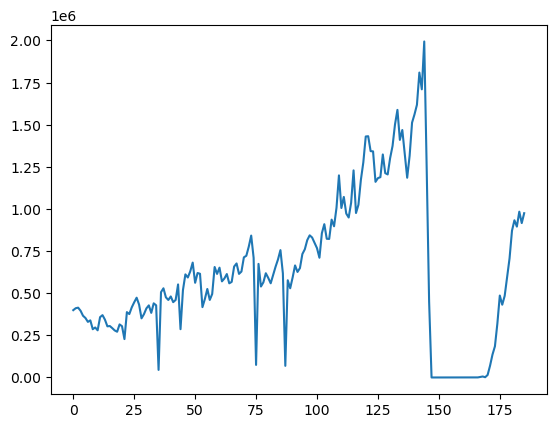

In [25]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [27]:
train_size = 148
validation_size = 19
test_size = 19

In [28]:
train = df1[0:148, :]
train.shape

(148, 1)

In [29]:
validation = df1[148:167, :]
validation.shape

(19, 1)

In [30]:
test = df1[167:186, :]
test.shape

(19, 1)

In [31]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [33]:
x_test, y_test = get_data(test, look_back)

In [34]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [35]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

Epoch 1/50
146/146 [==============================] - 17s 6ms/step - loss: 0.0983
Epoch 2/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0413
Epoch 3/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0240
Epoch 4/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0205
Epoch 5/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0189
Epoch 6/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0172
Epoch 7/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0158
Epoch 8/50
146/146 [==============================] - 1s 9ms/step - loss: 0.0143
Epoch 9/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0130
Epoch 10/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0118
Epoch 11/50
146/146 [==============================] - 1s 8ms/step - loss: 0.0109
Epoch 12/50
146/146 [==============================] - 1s 8ms/step - loss: 0.0098
Epoch 13/50
146/146 [===

In [36]:
y_pred = model.predict(x_test)

1/1 [==============================] - 4s 4s/step


In [37]:
scaler.scale_

array([5.01473077e-07])

In [38]:
y_pred = scaler.inverse_transform(y_pred)

In [39]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [40]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [41]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 83993.72557803421


In [42]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 76076.72012867648


In [43]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 6.577509994443827


In [44]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 45.63787646913029


In [45]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 2037.6150525127337


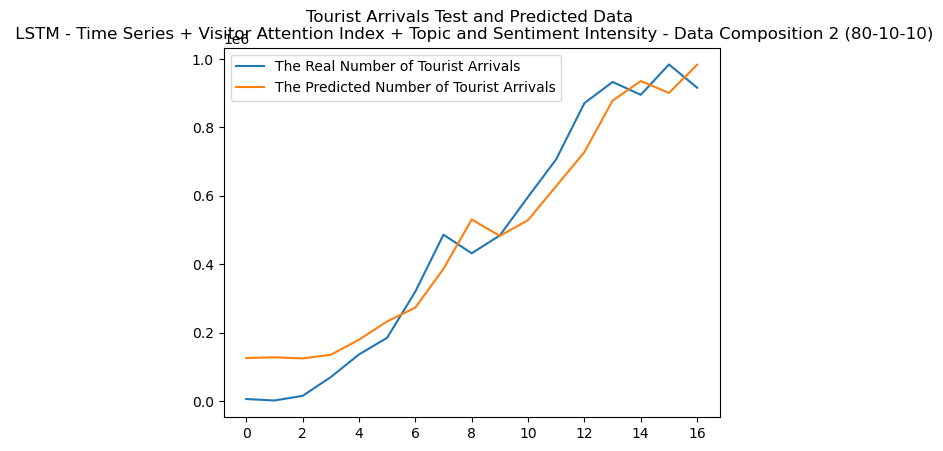

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 2 (80-10-10)")
plt.legend()
plt.show()